<a href="https://colab.research.google.com/github/roshanprabu/stock-price-predictor/blob/main/Stock_Price_Prediction_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting the stock prediction journey...
Fetching historical data for GOOG...


[*********************100%***********************]  1 of 1 completed

Downloaded 3522 days of data.
First few rows:
Price           Close       High        Low       Open     Volume
Ticker           GOOG       GOOG       GOOG       GOOG       GOOG
Date                                                             
2010-01-04  15.536650  15.605067  15.474428  15.541607   78541293
2010-01-05  15.468233  15.563671  15.407499  15.547310  120638494
2010-01-06  15.078299  15.514589  15.031199  15.514589  159744526
2010-01-07  14.727282  15.121431  14.691337  15.106557  257533695
2010-01-08  14.923613  14.954103  14.603584  14.675224  189680313

Data summary:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2010-01-04 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   3522 non-null   float64
 1   (High, GOOG)    3522 non-null   float64
 2   (Low, GOOG)     3522 non-null   float64
 3   (Open, GOOG)    3522 non-null   float64
 4   (Volume, GOO

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)


Training for 50 epochs...
Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - loss: 0.0189 - mean_absolute_error: 0.0841 - val_loss: 0.0028 - val_mean_absolute_error: 0.0452
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 9.4118e-04 - mean_absolute_error: 0.0215 - val_loss: 0.0015 - val_mean_absolute_error: 0.0326
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0012 - mean_absolute_error: 0.0216 - val_loss: 0.0034 - val_mean_absolute_error: 0.0484
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 9.0058e-04 - mean_absolute_error: 0.0199 - val_loss: 0.0060 - val_mean_absolute_error: 0.0683
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 8.8875e-04 - mean_absolute_error: 0.0209 - val_loss: 0.0020 - val_mean_absolute_error: 0.0385
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 6.4005e-04 - mean_absolute_error: 0.0168 - val_loss: 0.0013 - val_mean_absolute_error: 0.0295
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 9.3

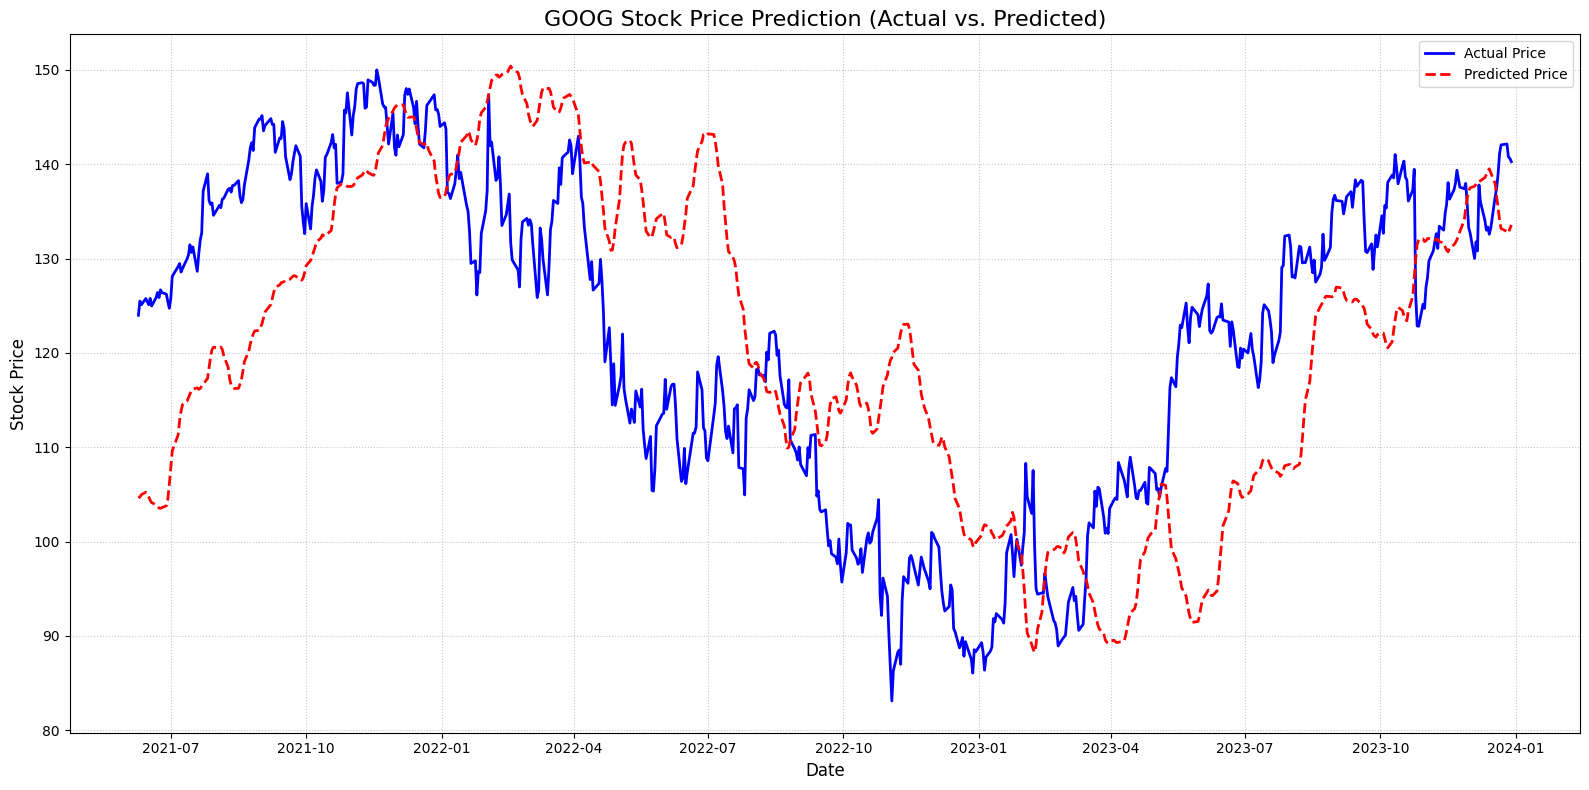

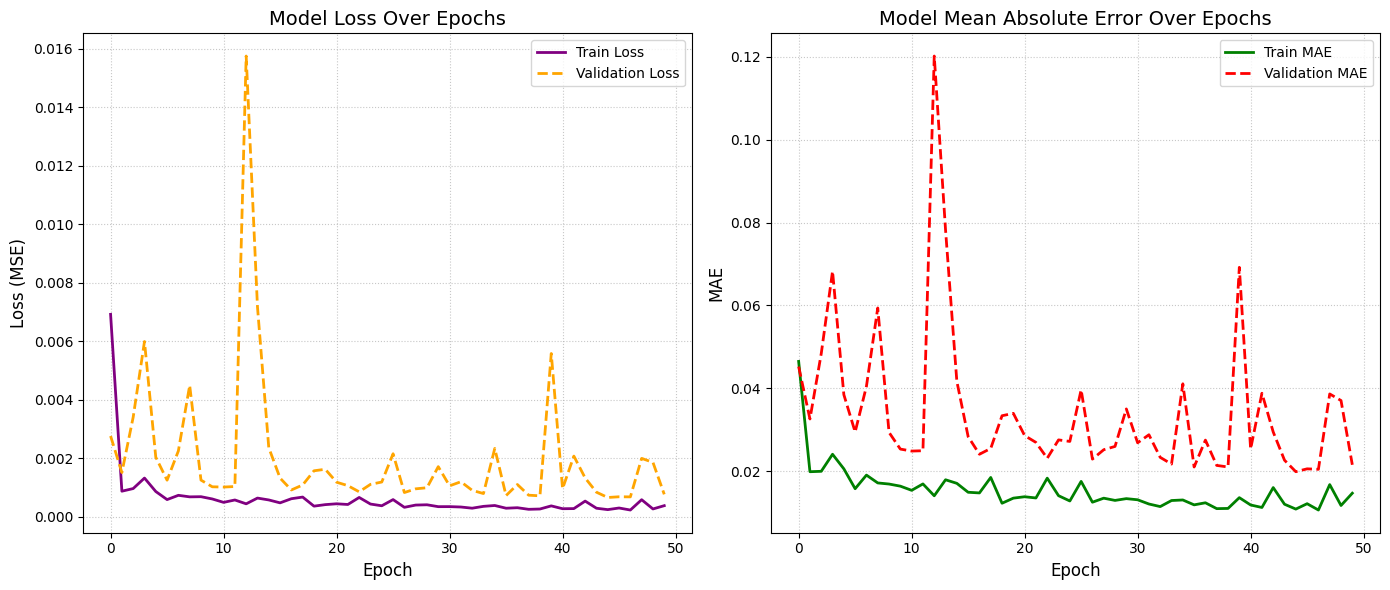


--- Stock Prediction Process Finished ---
Now you can play around! Try a different STOCK_TICKER, change the date range, or tweak the model parameters to see what happens.


In [6]:
"""
Stock Price Prediction using LSTM

This script builds and trains a Long Short-Term Memory (LSTM) neural network
to predict stock prices based on historical data. It covers data fetching,
preprocessing, model training, and evaluation.
"""

# --- Setup and Data Acquisition ---


# Comment this out after the first successful run.
# !pip install yfinance pandas numpy tensorflow matplotlib seaborn scikit-learn

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

import warnings
warnings.filterwarnings('ignore')

print("Starting the stock prediction journey...")

# --- Configuration ---
STOCK_TICKER = 'GOOG'
START_DATE = '2010-01-01'
END_DATE = '2023-12-31'

# Target price point. 'Close' from yfinance's MultiIndex is usually adjusted.
TARGET_FEATURE = ('Close', STOCK_TICKER)

# Past days the LSTM considers for each prediction.
SEQUENCE_LENGTH = 60

# Training settings.
TRAIN_SPLIT_RATIO = 0.8
EPOCHS = 50
BATCH_SIZE = 32

print(f"Fetching historical data for {STOCK_TICKER}...")

try:
    df = yf.download(STOCK_TICKER, start=START_DATE, end=END_DATE)

    if df.empty:
        raise ValueError(f"No data for {STOCK_TICKER} in range. Check ticker/dates.")

    print(f"Downloaded {len(df)} days of data.")
    print("First few rows:")
    print(df.head())
    print("\nData summary:")
    df.info()

except Exception as e:
    print(f"Error during data download: {e}")
    pass


#Data Preprocessing

print("\nGetting data ready for the model...")

data = df[[TARGET_FEATURE]].values

# Scale data to 0-1 range.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
print(f"Data scaled. Shape: {scaled_data.shape}")

# Split data chronologically into training and testing sets.
train_size = int(len(scaled_data) * TRAIN_SPLIT_RATIO)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size - SEQUENCE_LENGTH:, :] # Include look-back for test set.

print(f"Training data samples: {len(train_data)}.")
print(f"Testing data samples: {len(test_data)} (with look-back).")

# Create sequences for LSTM input.
train_generator = TimeseriesGenerator(
    train_data, train_data, length=SEQUENCE_LENGTH, batch_size=BATCH_SIZE
)
test_generator = TimeseriesGenerator(
    test_data, test_data, length=SEQUENCE_LENGTH, batch_size=BATCH_SIZE
)

print(f"Data in sequences of length {SEQUENCE_LENGTH}.")
print(f"Training batches: {len(train_generator)}. Testing batches: {len(test_generator)}.")


# Model Definition and Training

print("\nBuilding and training our LSTM model...")

# Define a simple sequential LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(SEQUENCE_LENGTH, 1)),
    Dropout(0.2),

    LSTM(units=50, return_sequences=False),
    Dropout(0.2),

    Dense(units=1)
])

# Compile the model with Adam optimizer and MSE loss
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

print("Model structure:")
model.summary()

print(f"\nTraining for {EPOCHS} epochs...")
# Train the model, validating on the test set
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator,
    verbose=1 # Show progress.
)
print("Training complete.")


# Prediction and Evaluation

print("\nEvaluating model performance...")

# Get scaled predictions from the test data
predicted_scaled_prices = model.predict(test_generator)

# Convert predictions back to original price scale
predicted_prices = scaler.inverse_transform(predicted_scaled_prices)

# Get actual prices for comparison
actual_prices = df[TARGET_FEATURE].values[train_size + SEQUENCE_LENGTH:]

# Ensure arrays match length for metrics and plotting
min_len = min(len(predicted_prices), len(actual_prices))
predicted_prices = predicted_prices[:min_len]
actual_prices = actual_prices[:min_len]

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

mse = mean_squared_error(actual_prices, predicted_prices)
rmse = sqrt(mse)
mae = mean_absolute_error(actual_prices, predicted_prices)

print(f"\nModel performance on {STOCK_TICKER} test data:")
print(f"  MSE: {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")

# Plot actual vs. predicted prices
plt.figure(figsize=(16, 8))
plt.plot(df.index[train_size + SEQUENCE_LENGTH:train_size + SEQUENCE_LENGTH + min_len], actual_prices, label='Actual Price', color='blue', linewidth=2)
plt.plot(df.index[train_size + SEQUENCE_LENGTH:train_size + SEQUENCE_LENGTH + min_len], predicted_prices, label='Predicted Price', color='red', linestyle='--', linewidth=2)
plt.title(f'{STOCK_TICKER} Stock Price Prediction (Actual vs. Predicted)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot training and validation loss/MAE
plt.figure(figsize=(14, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='purple', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', linewidth=2)
plt.title('Model Loss Over Epochs', fontsize=14)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle=':', alpha=0.7)

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE', color='green', linewidth=2)
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE', color='red', linestyle='--', linewidth=2)
plt.title('Model Mean Absolute Error Over Epochs', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

print("\n--- Stock Prediction Process Finished ---")
print("Now you can play around! Try a different STOCK_TICKER, change the date range, or tweak the model parameters to see what happens.")


# New section